In [2]:
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
import plotly
import plotly.offline as py
from plotly.graph_objs import *
from ipywidgets import interact
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv("https://raw.githubusercontent.com/jasonjgy2000/Cuny/master/Data%20608/Homework%204/Data/riverkeeper_data_2013.csv")

In [68]:
data.head(5)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


# Data Cleansing

In [5]:
data.dtypes

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

The Date column will be converted from a string data type to date. Removing less and more than signs from EnterCount and convert it to int datatype. Changing Site from string to category

In [32]:
data['Date'] = pd.to_datetime(data["Date"])
data['Site'] = data['Site'].astype('category')
data['EnteroCount'] = data['EnteroCount'].str.replace(r'\<|>', '').astype('int64')
# remove Na
data = data.dropna()

In [7]:
data[3230:3234]

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
3230,East River mid-channel at 23rd St.,2013-06-19,10,0.2,50
3231,East River mid-channel at 23rd St.,2013-05-31,10,0.5,50
3232,East River mid-channel at 23rd St.,2012-11-08,121,1.2,50
3233,East River mid-channel at 23rd St.,2012-10-10,31,0.5,50


In [33]:
data.dtypes

Site                      category
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

# Create lists & graphs of the best and worst places to swim in the dataset

In [34]:
# water is unacceptable if a single sample is greater than 110 Enterococcus/100 mL
# water is unacceptable if five(5) or more samples weighted average is more than 30 Enterococcus/100 mL

data['Year'] = data['Date'].apply(lambda x: x.year)
placesToSwim = data.groupby(['Site','Year'])['EnteroCount'].sum()
placesToSwim = placesToSwim.to_frame().reset_index()
placesToSwim['RecordCount'] = data.groupby(['Site','Year'])['EnteroCount'].transform('count')
placesToSwim['yearSum'] = placesToSwim.groupby(['Year'])['RecordCount'].transform('sum')
placesToSwim['WeightedMean'] = (placesToSwim['EnteroCount'] * placesToSwim['RecordCount'])/ placesToSwim['yearSum']

In [35]:
# add unaccecptable/ acceptable check
placesToSwim['Classification'] = np.where(((placesToSwim.WeightedMean > 110) & (placesToSwim.RecordCount < 5 )) |
                                          ((placesToSwim.WeightedMean > 30) & (placesToSwim.RecordCount > 4 ))
                                          ,'unacceptable', 'acceptable')


In [36]:
placesToSwim.head()

,Site,Year,EnteroCount,RecordCount,yearSum,WeightedMean,Classification
0,125th St. Pier,2006,3751,6,141,159.617021,unacceptable
1,125th St. Pier,2007,5804,6,160,217.650000,unacceptable
2,125th St. Pier,2008,105,6,456,1.381579,acceptable
3,125th St. Pier,2009,237,6,452,3.146018,acceptable
4,125th St. Pier,2010,246,6,449,3.287305,acceptable


In [ ]:
#Worse Places to Swim

In [63]:
def plot_it(Year,Filter,Sorting):
    placesToSwimData = placesToSwim[(placesToSwim['Year']==int(Year)) & (placesToSwim['Classification']==Filter)]
    if Filter == 'acceptable':
        placesToSwimData = placesToSwimData.head(10)
    else:
        placesToSwimData = placesToSwimData.tail(10)
    
    if Sorting == 'ascending':
        placesToSwimData = placesToSwimData.sort_values(['WeightedMean'],ascending=[True])
    else:
        placesToSwimData = placesToSwimData.sort_values(['WeightedMean'],ascending=[False])
    
    fig = {
        'data': [
            {
                'x': placesToSwimData['Site'],
                'y': placesToSwimData['WeightedMean'],
                'name': Year,
                'type': 'bar'
            }
        ],
        
    'layout': Layout(xaxis=XAxis(title='Site'), yaxis=YAxis(title='Weighted Mean'))
    }
    py.iplot(fig)

In [64]:
interact(plot_it, Year=('2006', '2007','2008', '2009', '2010', '2011', '2012', '2013'),         
         Filter =('acceptable','unacceptable'),Sorting=('ascending','descending'))

<function __main__.plot_it>

In [39]:
years = [2006,2007,2008,2009,2010,2011,2012,2013]
for year in years:
    test = placesToSwim[((placesToSwim['Year']==year) & (placesToSwim['Classification'] == 'acceptable') )]
    test = test.sort_values(['WeightedMean'],ascending=True).head(10)[['Site','WeightedMean']].reset_index(drop=True)
    test.columns = ['Site','Weighted EnteroCount']
    print '---------------------------------------------'
    print 'Best Places to swim for the Year '+ str(year)
    print test

---------------------------------------------
Best Places to swim for the Year 2006
                         Site  Weighted EnteroCount
0     Stony Point mid-channel              0.085106
1          Croton Point Beach              1.191489
2              Ossining Beach              3.659574
3  Haverstraw Bay mid-channel              3.872340
4         Yonkers STP Outfall              4.127660
5    North River STP at 145th              4.638298
6               Furnace Brook              4.765957
7       GW Bridge mid-channel              6.340426
8        79th St. mid-channel              7.787234
9         Yonkers mid-channel              8.170213
---------------------------------------------
Best Places to swim for the Year 2007
                              Site  Weighted EnteroCount
0  Peekskill Riverfront Green Park                1.5375
1               Croton Point Beach                1.7250
2              Yonkers mid-channel                3.6750
3                    Furnace Bro

In [40]:
for year in years:
    test = placesToSwim[((placesToSwim['Year']==year) & (placesToSwim['Classification'] == 'unacceptable') )]
    test = test.sort_values(['WeightedMean'],ascending=False).head(10)[['Site','WeightedMean']].reset_index(drop=True)
    test.columns = ['Site','Weighted EnteroCount']
    print '---------------------------------------------'
    print 'Worst Places to swim for the Year '+ str(year)
    print test

---------------------------------------------
Worst Places to swim for the Year 2006
                                      Site  Weighted EnteroCount
0                     Upper Sparkill Creek            360.340426
1                   Orangetown STP Outfall            212.085106
2                           125th St. Pier            159.617021
3                           Saw Mill River            148.936170
4                            Piermont Pier            116.042553
5  Newtown Creek- Metropolitan Ave. Bridge            106.170213
6               Newtown Creek- Dutch Kills             74.425532
7          Harlem River- Washington Bridge             68.340426
---------------------------------------------
Worst Places to swim for the Year 2007
                                      Site  Weighted EnteroCount
0                     Upper Sparkill Creek             445.50000
1                           125th St. Pier             217.65000
2  Newtown Creek- Metropolitan Ave. Bridge        

# 2. Which sites have been tested most regularly?

In [91]:
testRegularly = data.groupby(['Site'])['EnteroCount'].count()
testRegularly = testRegularly.to_frame().reset_index()
testRegularly.columns = ['Site','Number of Tests']
testRegularly = testRegularly.sort_values(['Number of Tests'],ascending=False).head(10).reset_index(drop=True)
testRegularly

,Site,Number of Tests
0,Piermont Pier,187
1,Upper Sparkill Creek,165
2,125th St. Pier,66
3,Nyack Launch Ramp,61
4,Newtown Creek- Dutch Kills,57
5,TZ Bridge mid-channel,57
6,Orangetown STP Outfall,57
7,Newtown Creek- Metropolitan Ave. Bridge,57
8,Yonkers mid-channel,52
9,Yonkers STP Outfall,51


# 3. Which ones have long gaps between tests

In [41]:
for year in years:
    testingGap = data[data['Year'] == year]
    testingGap = testingGap.sort_values('Date').groupby(['Site'])['Date'].apply(lambda x: x.diff().mean()).to_frame().reset_index()
    # remove Nat
    testingGap = testingGap[testingGap.Date.notnull()]
    testingGap['Date']= testingGap['Date'].apply(lambda x: x.days)
    testingGap.columns = ['Site','Gap(Days)']
    print '---------------------------------------------------'
    print 'Year '+ str(year)
    print testingGap.sort_values('Gap(Days)',ascending=False).head(10).reset_index(drop=True)

---------------------------------------------------
Year 2006
                                      Site  Gap(Days)
0                         Cedar Pond Brook         47
1               Haverstraw Bay mid-channel         39
2                       Croton Point Beach         39
3                            Furnace Brook         39
4                           Ossining Beach         39
5                           Saw Mill River         33
6  Newtown Creek- Metropolitan Ave. Bridge         26
7                      Yonkers STP Outfall         26
8               Newtown Creek- Dutch Kills         26
9                      Yonkers mid-channel         26
---------------------------------------------------
Year 2007
                                      Site  Gap(Days)
0                  Stony Point mid-channel         45
1          Peekskill Riverfront Green Park         37
2                      Yonkers STP Outfall         28
3                  The Battery mid-channel         28
4  East Rive

In [60]:
def plot_gaps(Year,Sorting):
    
    testingGap = data[data['Year']== int(Year)]
    testingGap = testingGap.sort_values('Date').groupby(['Site'])['Date'].apply(lambda x: x.diff().mean()).to_frame().reset_index()
    # remove Nat
    testingGap = testingGap[testingGap.Date.notnull()]
    testingGap['Date']= testingGap['Date'].apply(lambda x: x.days)
    testingGap.columns = ['Site','Gap(Days)']
    if Sorting == 'ascending':
        testingGap = testingGap.sort_values('Gap(Days)',ascending=True).head(10)
    else:
        testingGap = testingGap.sort_values('Gap(Days)',ascending=False).head(10)
    
    fig = {
        'data': [
            {
                'x': testingGap['Site'],
                'y': testingGap['Gap(Days)'],
                'name': Year,
                'type': 'bar'
            }
        ],
    'layout': Layout(xaxis=XAxis(title='Site'), yaxis=YAxis(title='Gap(Days)'))
    }
    py.iplot(fig)

In [61]:
interact(plot_gaps, Year=('2006', '2007','2008', '2009', '2010', '2011', '2012', '2013'),Sorting=('ascending','descending'))

<function __main__.plot_gaps>

# 4. Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them

In [45]:
relationship = data[['EnteroCount','FourDayRainTotal']]
relationship.head()

,EnteroCount,FourDayRainTotal
0,1733,1.5
1,4,0.2
2,20,0.0
3,6,0.0
4,31,0.0


# Scatterplot of the data

In [65]:
trace = Scatter(
    x = relationship['FourDayRainTotal'],
    y = relationship['EnteroCount'],
    mode = 'markers',
    name='Scatter Plot'
)

plotData = [trace]

layout = Layout(
    title='Scatter Plot',
    xaxis=dict(
        title='Four Day Rain Total',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Entero Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = Figure(data=plotData, layout=layout)
py.iplot(fig, filename='basic-scatter')

There seems to be a strong relationship between rainfall and Entero Count. It seems that once there is more than 2.5 inches of rain the Entero readings values are lower.

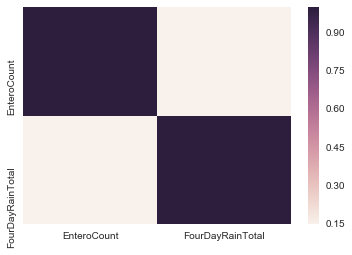

In [66]:
import seaborn as sns
corr = relationship.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)